# EAS 503 Final Project Group 3
Group member: Yuan Hui
              Yiqing Zhong
              Terrance Christian

## Introduction
Yelp Restaurant Data Analysis aims at doing exploratory data analysis for the restaurants that are available in the Yelp data provided by kaggle. The key idea is to understand different types of restaurants and the ratings of those restaurant and provide different visualisations that provide meaningful insights about those restaurants.

The project also focuses on providing recommendation to users based on the attributes they select. These recommendations are also plotted on a map to provide better visualisation.


## SQL relations schema
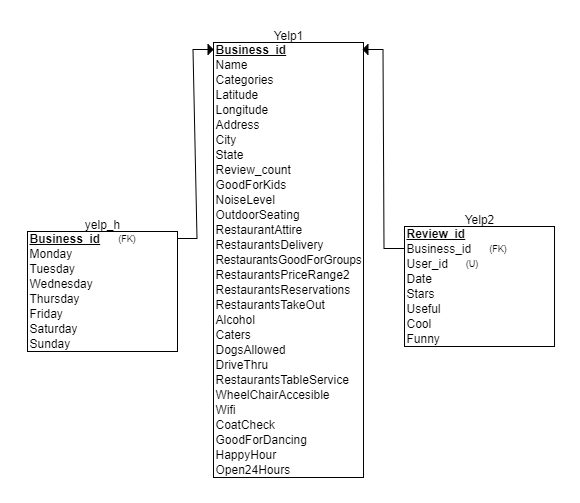

In [3]:
### import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns 
from tkinter import *
import imageio
import folium
import folium.plugins as plugins
import pymysql.cursors
from math import sin, cos, sqrt, atan2, radians
import pymysql as pymysql

# Section 1. General explorary: understanding the data

In [2]:
##import sql data into pandans
db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="HuiYuan&1990",       # your password
                     db="yelpdb")    # name of the data base

In [3]:
restaurants = pd.read_sql(sql = 'SELECT business_id, name, categories, latitude, longitude , city, state, postal_code, stars, review_count, NoiseLevel, RestaurantsAttire, RestaurantsPriceRange2, Alcohol FROM YELP1', con = db)
review = pd.read_sql(sql = 'SELECT business_id, review_id, date, stars FROM YELP2', con = db)

In [4]:

restaurants.head()
restaurants.shape   ##There are total 57173 restaurants included in the database, 32 field for this database

(57173, 14)

In [5]:
restaurants_attributes=list(restaurants)
print(restaurants_attributes)### Restaurant attributes

['business_id', 'name', 'categories', 'latitude', 'longitude', 'city', 'state', 'postal_code', 'stars', 'review_count', 'NoiseLevel', 'RestaurantsAttire', 'RestaurantsPriceRange2', 'Alcohol']


In [6]:
review.head()
review.shape   ##There are total 3654797 reviews included in the database, 8 field for this database

(3654797, 4)

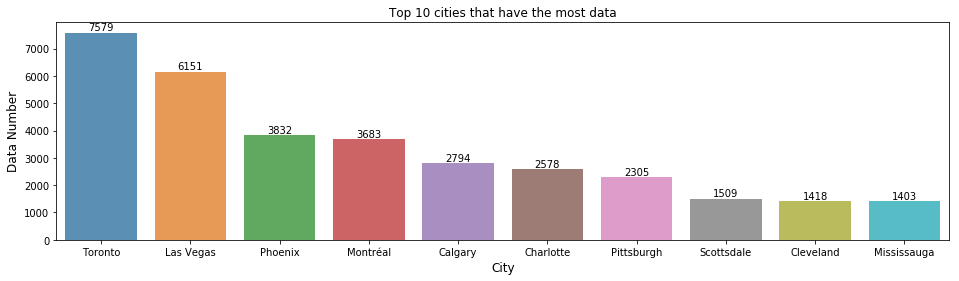

In [46]:
## Top 10 cities have have the most data

most_data_cities = pd.read_sql(sql = 'select city, count(*) as Restaurants_Number \
from yelp1 group by city order by count(*) desc limit 10', con = db)
x_city=most_data_cities['city']
y_city=most_data_cities['Restaurants_Number']
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_city, y_city, alpha=0.8)
plt.title("Top 10 cities that have the most data",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Data Number', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = y_city
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Text(0.5,0,'Number of Reviews')

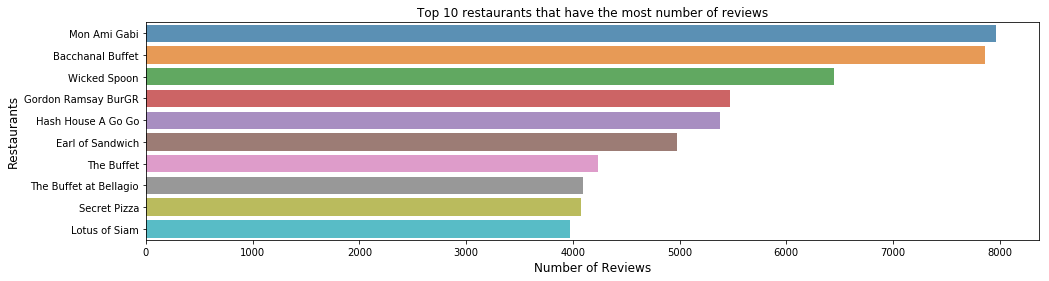

In [41]:
## Top restaurants that have the most number of reviews

most_data_cities = pd.read_sql(sql = 'select name, review_count from  yelp1 order by review_count desc limit 10', con = db)
x_rest=most_data_cities['review_count']
y_rest=most_data_cities['name']
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_rest, y_rest, alpha=0.8)
plt.title("Top 10 restaurants that have the most number of reviews",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Restaurants', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)



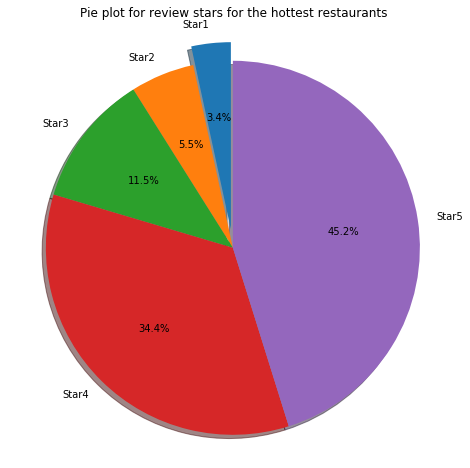

In [56]:
##Find the stars components for the restaurant that has the most reviews

hot_cities = pd.read_sql(sql = 'select date, stars from yelp2 where business_id=\
                         (select new.business_id from (select name, business_id, \
                         review_count from yelp1 where review_count=(select max(review_count) from yelp1)) new)', con = db)

count_hotcity=hot_cities.groupby('stars').count()
star=list(count_hotcity.index.values)
count=list(count_hotcity['date'])

labels = ['Star' + str(s) for s in star]

explode = (0.1, 0, 0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie plot for review stars for the hottest restaurants")
plt.show()

Text(0.5,1,'Time series of review number for the hottest restaurants')

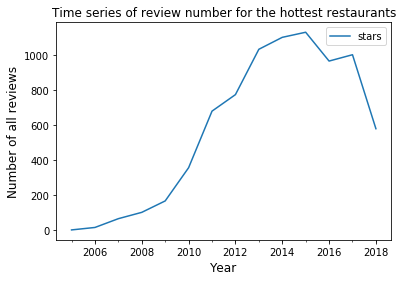

In [77]:
##plot the total number of reviews from 2005 to 2018 for the hottest restaurants
hot_cities['date']=pd.to_datetime(hot_cities['date'].values)

hot_cities.set_index('date').resample('A').count().plot()
plt.ylabel('Number of all reviews',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of review number for the hottest restaurants")

Text(0.5,0,'Number of reviews')

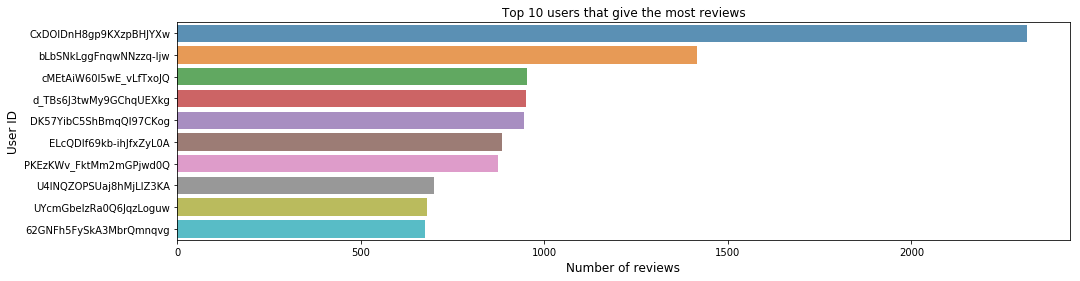

In [80]:
## Top 10 reviewers that give the most number of useful, funny or cool reviews
most_active_user = pd.read_sql(sql = 'select user_id, count(*) as Number from yelp2 \
group by user_id order by count(*) desc limit 10', con = db)
x_user=most_active_user['Number']
y_user=most_active_user['user_id']
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_user, y_user, alpha=0.8)
plt.title("Top 10 users that give the most reviews",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('User ID', fontsize=12)
plt.xlabel('Number of reviews', fontsize=12)



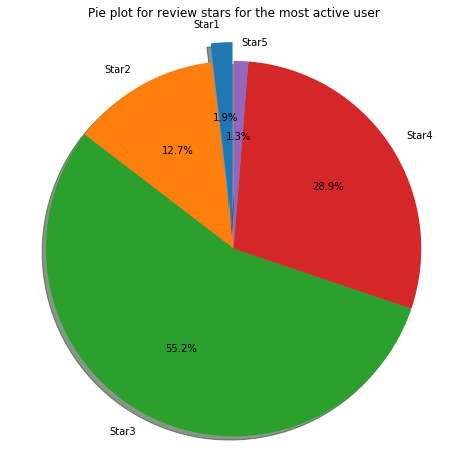

In [83]:
##Find the stars components for the user that gives the most reviews

active_user = pd.read_sql(sql = 'select date, stars, useful, cool, funny from \
yelp2 where user_id=(select new.user_id from (select user_id, count(*) \
as number from yelp2 group by user_id order by count(*) desc limit 1) new)', con = db)

groupby_hotuser=active_user.groupby('stars').count()
star=list(groupby_hotuser.index.values)
count=list(groupby_hotuser['date'])

labels = ['Star' + str(s) for s in star]

explode = (0.1, 0, 0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie plot for review stars for the most active user")
plt.show()

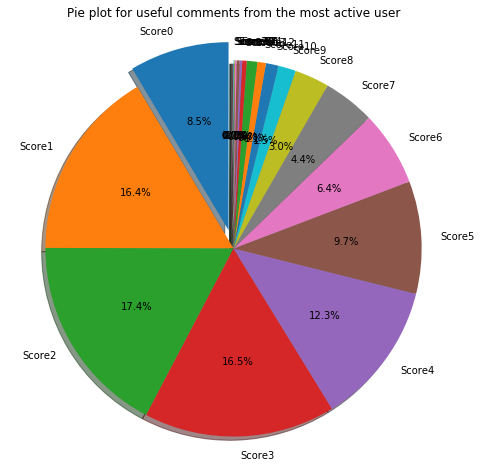

In [86]:
##Find the percent of useful comments from the user that gives the most reviews


groupby_useful=active_user.groupby('useful').count()
useful=list(groupby_useful.index.values)
count=list(groupby_useful['date'])

labels = ['Score' + str(s) for s in useful]

explode = (0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie plot for useful comments from the most active user")
plt.show()

Text(0.5,1,'Time series of review number given by the most active user')

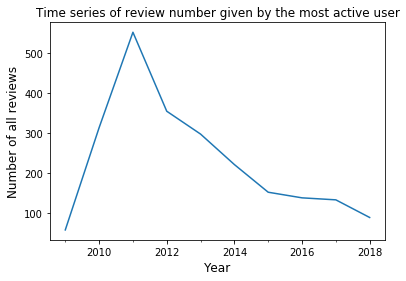

In [90]:
##plot the total number of reviews from 2005 to 2018 given by the most active user
active_user['date']=pd.to_datetime(active_user['date'].values)

active_user.set_index('date').resample('A').count()['stars'].plot()
plt.ylabel('Number of all reviews',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of review number given by the most active user")

Text(0.5,0,'Open Hours')

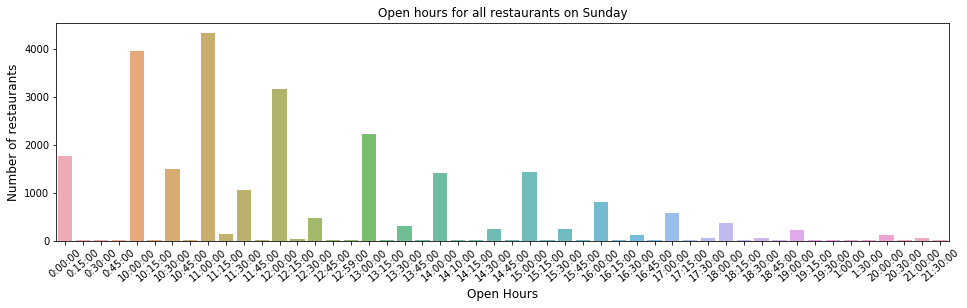

In [152]:
##Get the opening hours for restaurants on Sunday
from datetime import datetime
Sunday_hour = pd.read_sql(sql = 'select Sunday, count(*) from yelp_h group by Sunday', con = db)
open_hour=[]
for i in range(len(Sunday_hour)):
    a=list(Sunday_hour['Sunday'].values)[i].split('-')
    #set the date and time format
    date_format = "%H:%M"
    #convert string to actual date and time
    if (a!=['']):
        time1  = datetime.strptime(a[0], date_format)
        time2  = datetime.strptime(a[1], date_format)
        open_hour.append(str(time2-time1))
    else:
        open_hour.append('NaN')


new_open_hour = [x.replace('-1 day, ', '') for x in open_hour]
Sunday_hour['open_hour']=new_open_hour
open_data=Sunday_hour.groupby('open_hour').sum()

y_hour=list(open_data['count(*)'].values)[:50]
x_hour=list(open_data.index.values)[:50]
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_hour, y_hour, alpha=0.8)
plt.title("Open hours for all restaurants on Sunday",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=40)
plt.ylabel('Number of restaurants', fontsize=12)
plt.xlabel('Open Hours', fontsize=12)


# Section2.Plot the restaurants in maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total Number of Restaurants: 57173


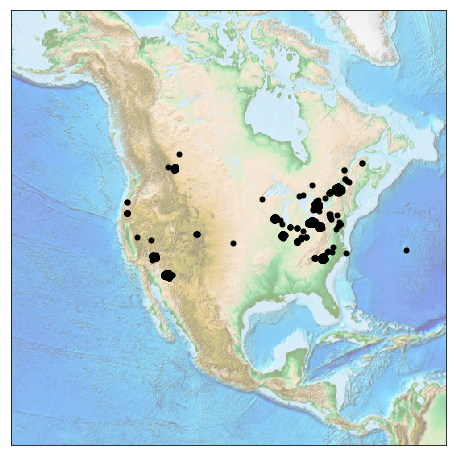

In [7]:
###Show the geographical distribution all restaurants in United States in the map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=42, lon_0=-100)

m.etopo(scale=0.5, alpha=0.5)

x=restaurants["longitude"].values
y=restaurants["latitude"].values
x, y = m(x, y)
plt.plot(x, y, 'ok', markersize=5)

##Number of total restuarants shown in the map
print("Total Number of Restaurants:", x.size)

In [8]:
## Give a more closer look at the regional distribution based on users specified cities.
cities=set(restaurants["city"].values)
## Users are able to choose a city among this list
cities

{'',
 'AGINCOURT',
 'Agincourt',
 'Ahwatukee',
 'Airdrie',
 'Ajax',
 'Allison Park',
 'Ambridge',
 'Amherst',
 'Ange-Gardien',
 'Angus',
 'Anjou',
 'Anthem',
 'Argos',
 'Arnold',
 'Aspinwall',
 'Auburn Township',
 'Auburn Twp',
 'Aurora',
 'Avalon',
 'Avon',
 'Avon Lake',
 'Avondale',
 "Baie-D'urfe",
 "Baie-d'Urfé",
 'Bainbridge',
 'Bainbridge Township',
 'Baldwin',
 'Balzac',
 'Bath',
 'Bay Village',
 'Beachwood',
 'Beaconsfield',
 'Beauharnois',
 'Bedford',
 'Bedford Heights',
 'Bedford Hts.',
 'Beeton',
 'Bell',
 'Bellagio',
 'Belleville',
 'Bellevue',
 'Bellvue',
 'Belmont',
 'Beloeil',
 'Ben Avon',
 'Berea',
 'Bethel Park',
 'Black Earth',
 'Blainville',
 'Blakeney',
 'Blawnox',
 'Bloomfield',
 'Blue Diamond',
 'Bois-Des-Filion',
 'Bois-des-Filion',
 'Boisbriand',
 'Bolton',
 'Bond Head',
 'Boucherville',
 'Boulder City',
 'Braddock',
 'Bradford',
 'Bradford West Gwillimbury',
 'Brampton',
 'Bratenahl',
 'Brecksville',
 'Brentwood',
 'Brettin',
 'Bridgeville',
 'Bright',
 'Broadvi

In [4]:
#### Provide the users a GUI where they can input their interested city

##This is function is adapted from https://www.python-course.eu/tkinter_entry_widgets.php
def show_entry_fields():
   print("The user is interested in the restaurants in %s in %s state" % (e1.get(), e2.get()))

master = Tk()
Label(master, text="City").grid(row=0)
Label(master, text="State").grid(row=1)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
Button(master, text='Quit', command=master.quit).grid(row=3, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

mainloop( )


In [10]:
interested_city=e1.get()
interested_state=e2.get()
print(interested_city)
print(interested_state)

Phoenix
AZ


Text(0,0.5,'Latitude')

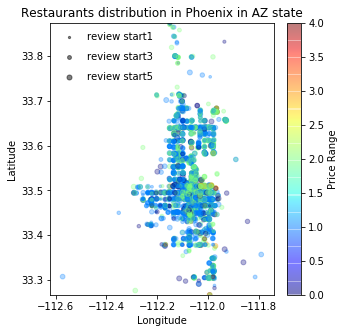

In [11]:
###Plot Scatter for the restaurants in the selected city
selected_restaurants = restaurants.loc[(restaurants['city'] == interested_city) & (restaurants['state'] == interested_state)]
fig = plt.figure(figsize=(5,5))
#m = Basemap(projection='merc',llcrnrlat=selected_restaurants['latitude'].nsmallest(2).iloc[-1],urcrnrlat=selected_restaurants['latitude'].max(),\
#        llcrnrlon=selected_restaurants['longitude'].min(),urcrnrlon=selected_restaurants['longitude'].max(),lat_ts=20,resolution='c')


x = selected_restaurants['longitude'].values
y = selected_restaurants['latitude'].values

colors = selected_restaurants['RestaurantsPriceRange2'].values
sizes = selected_restaurants['stars'].values*5
#x, y = m(x, y)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='jet')
plt.ylim(selected_restaurants['latitude'].nsmallest(2).iloc[-1], selected_restaurants['latitude'].max())
cbar=plt.colorbar()  # show color scale
cbar.set_label("Price Range")
# make legend with dummy points
for a in [1, 3, 5]:
    plt.scatter([], [], c='k', alpha=0.5, s=a*5,
                label='review start' + str(a))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='upper left')
plt.title("Restaurants distribution in %s in %s state" % (interested_city, interested_state))

plt.xlabel("Longitude")
plt.ylabel("Latitude")

Section 2: Map animation show

In [12]:
##Generate an animation that show the locations of restaurants with different review stars
data=[]

stars_list=sorted(list(selected_restaurants['stars'].unique()))
for star in stars_list:
    subset=selected_restaurants[selected_restaurants['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())

lat = selected_restaurants['latitude'].mean()
lon = selected_restaurants['longitude'].mean()
zoom_start=10
print("Animation for restaurants with different starts in %s in %s state" % (interested_city, interested_state))

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,index=stars_list,max_opacity=0.3,auto_play=True,display_index=True,radius=10)
hm.add_to(m)
m

Animation for restaurants with different starts in Phoenix in AZ state


# Section 3. Explorary Data Analysis--Plots of restaurant attributes

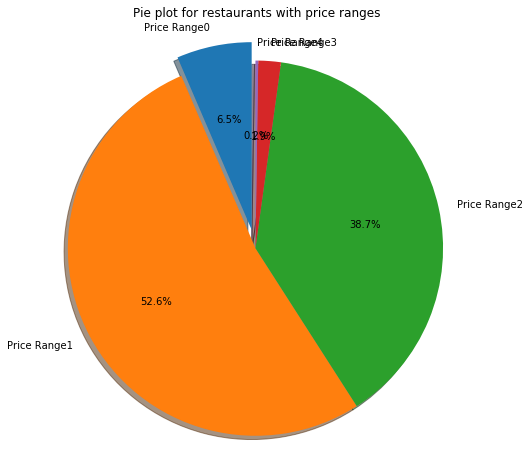

In [13]:
##Distribution of price range in the interested city
price_range=selected_restaurants.groupby('RestaurantsPriceRange2').count()
range_set=list(price_range.index.values)
number_set=list(price_range['business_id'])

labels = ['Price Range' + str(s) for s in range_set]

explode = (0.1, 0, 0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(number_set, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie plot for restaurants with price ranges")
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


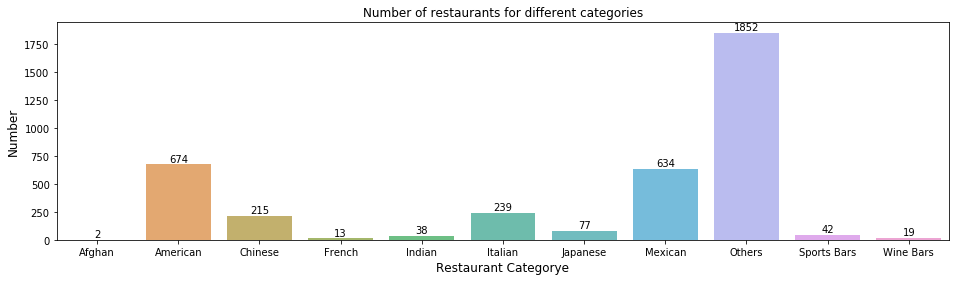

In [14]:
### Plot the number of restaurants for different categories
Category=['American','Chinese','Italian','French','Indian','Mexican','Afghan','Japanese','Wine Bars','Sports Bars']
cat=[]
for i in selected_restaurants['categories'].values:
    cator=[j for j in Category if j in i]
    if cator != []:
        cator=cator[0]
    else:
        cator='Others'
    cat.append(cator)
selected_restaurants['Simple_Category']=cat
category_number=selected_restaurants.groupby('Simple_Category').count()
plot_x=category_number.index.values
plot_y=category_number['business_id'].values

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(plot_x, plot_y, alpha=0.8)
plt.title("Number of restaurants for different categories",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Restaurant Categorye', fontsize=12)

#adding the text labels
rects = ax.patches
labels = plot_y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

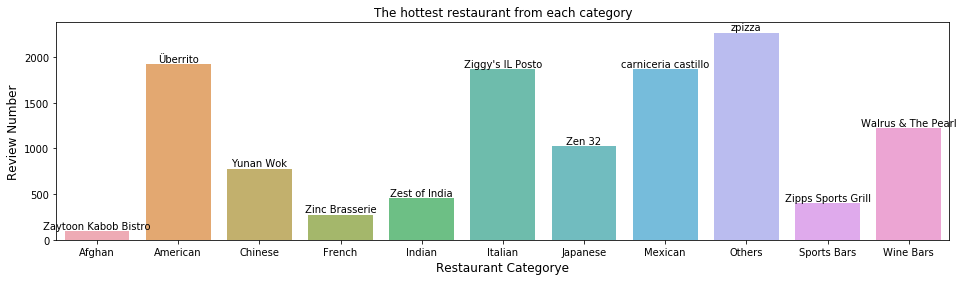

In [16]:
##For each category of restaurant, suggest the 'hottest' restaurant that received the most reviews
hot=selected_restaurants[['name','review_count','Simple_Category']].groupby('Simple_Category').max()
hot
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(hot.index.values, hot['review_count'], alpha=0.8)
plt.title("The hottest restaurant from each category",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Review Number', fontsize=12)
plt.xlabel('Restaurant Categorye', fontsize=12)

#adding the text labels
rects = ax.patches
labels = hot['name']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

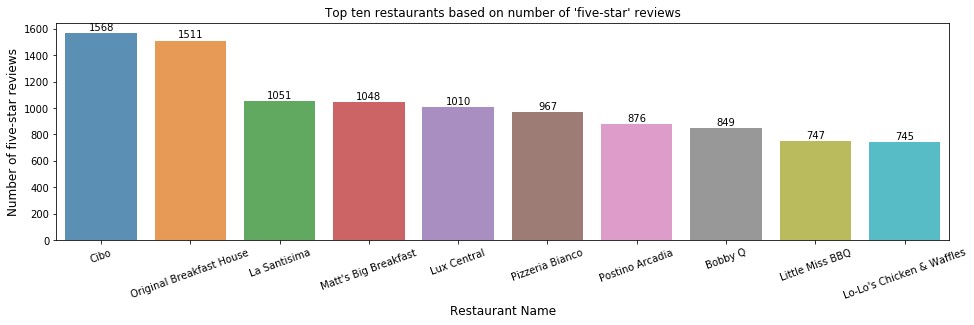

In [15]:
##find the top 10 restaurants that get the most 'five star' review in the interested city
interested_busID=selected_restaurants['business_id'].values
interested_review=review[review['business_id'].isin(interested_busID)]
five_star_review=interested_review[interested_review['stars']==5]
sorted_list=five_star_review.groupby('business_id').count().sort_values(by=['review_id'], ascending=False)
top_ten=list(sorted_list[:10].index.values)
top_restaurant=selected_restaurants[selected_restaurants['business_id'].isin(top_ten)]
names=top_restaurant['name'].values
counts=list(sorted_list[:10]['review_id'].values)

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(names, counts, alpha=0.8)
plt.title("Top ten restaurants based on number of 'five-star' reviews",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
plt.ylabel('Number of five-star reviews', fontsize=12)
plt.xlabel('Restaurant Name', fontsize=12)

#adding the text labels
rects = ax.patches
labels = counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Text(0.5,1,'Time series of review number for the top ten restaurants')

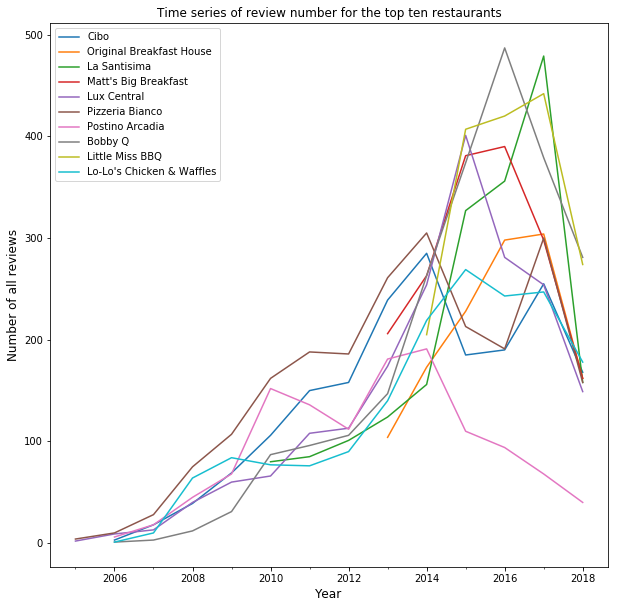

In [16]:
##For these top ten restaurants, the number of reviews change with year
merged=pd.merge(interested_review,selected_restaurants[['business_id','name']])
top_ten_annual_review=merged[merged['business_id'].isin(top_ten)]
top_ten_annual_review = top_ten_annual_review.set_index(pd.DatetimeIndex(top_ten_annual_review['date']))
figure=plt.figure(figsize=(10,10))
a=top_ten_annual_review.groupby('name').resample('A').count()['business_id']
for i in names:
    a[i].plot(label=i)
plt.legend()
plt.ylabel('Number of all reviews',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of review number for the top ten restaurants")

Section 3. Explorary Data Analysis--Export relationship between variables

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1859: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1860: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


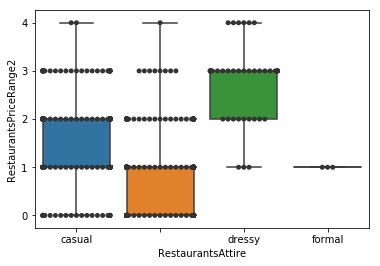

In [17]:
###Explore price range versus cloth required
#sns.pairplot(selected_restaurants[['RestaurantsAttire','RestaurantsPriceRange2']])
ax = sns.boxplot(x="RestaurantsAttire", y="RestaurantsPriceRange2", data=selected_restaurants, whis=np.inf)
ax = sns.swarmplot(x="RestaurantsAttire", y="RestaurantsPriceRange2", data=selected_restaurants, color=".2")

Text(0.5,1,'Relationship of stars and number of reviews')

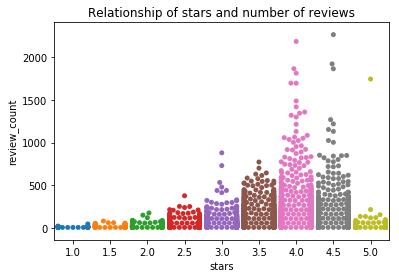

In [20]:
###Explore number of reviews versus star rates
sns.swarmplot(x="stars", y="review_count", data=selected_restaurants).set_title("Relationship of stars and number of reviews")


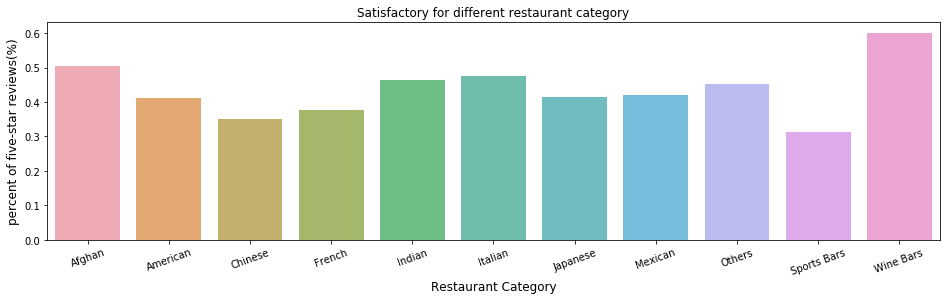

In [18]:
## Explore number of five-star review versus restaurant type
merged_type=pd.merge(selected_restaurants[['business_id','Simple_Category']],interested_review)
total=merged_type.groupby('Simple_Category').count()['business_id']
type_all=list(total.index.values)
five_review_total=np.array(total.values)



merged_type_five=merged_type[merged_type['stars']==5]
b=merged_type_five.groupby('Simple_Category').count()['business_id']
type_cat=list(b.index.values)
five_review_NO=np.array(b.values)
percent=five_review_NO/five_review_total


#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(type_cat, percent, alpha=0.8)
plt.title("Satisfactory for different restaurant category",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
plt.ylabel('percent of five-star reviews(%)', fontsize=12)
plt.xlabel('Restaurant Category', fontsize=12)


plt.show()

# Section 4. A filter to restaurants 
Based on categories: e.g. price, star rates, restaurant type, number of reviews, distance, whether they can be taken out, whether accept credit card, etc that the user could select from, we give a list of qualified restaurants and plot them in the google map with the scatterplot.


In [5]:
def show_entry_fields():
   print(""""The user is interested in the restaurants in %s in %s state that in category of %s, postal area is 
          %s, %s star, number of reviews more than %s, price range is %s""" % (interested_city,interested_state,e1.get(),
                                                                                 e2.get(),e3.get(),e4.get(),e5.get()))

master = Tk()
Label(master, text="Category").grid(row=0)
Label(master, text="Zip code").grid(row=1)
Label(master, text="Star").grid(row=2)
Label(master, text="Review Number").grid(row=3)
Label(master, text="Price Range").grid(row=4)
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)

Button(master, text='Quit', command=master.quit).grid(row=6, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=6, column=1, sticky=W, pady=4)

mainloop( )

In [20]:
filtered_cat=e1.get()
filtered_post=e2.get()
filtered_star=e3.get()
filtered_review=e4.get()
filtered_price=e5.get()

In [21]:
filtered_restaurants = selected_restaurants.loc[(selected_restaurants['Simple_Category']==filtered_cat) 
                                                & (selected_restaurants['postal_code'] == filtered_post)
                                                & (selected_restaurants['stars'] == int(filtered_star))
                                                & (selected_restaurants['review_count'] >= int(filtered_review))
                                                & (selected_restaurants['RestaurantsPriceRange2'] == int(filtered_price))]
show_table=filtered_restaurants[['name','postal_code']]
show_table

,name,postal_code
433,Pizza People Pub,85004
759,Blue Hound Kitchen & Cocktails,85004
1930,Province Urban Kitchen & Bar,85004
7775,Chambers on First,85004
11710,Breakfast Club- CityScape,85004
20980,The Roosevelt,85004
23756,Deli Tavern,85004
30115,Dust Cutter,85004
30749,Renaissance Phoenix Downtown Hot,85004
30862,Tommy Pastrami NY Deli,85004


In [22]:
##Show the filtered restaurants on map

filterd_lat=filtered_restaurants['latitude'].mean()
filterd_lon=filtered_restaurants['longitude'].mean()
filterd_map = folium.Map(location=[filterd_lat, filterd_lon],
                        tiles = "OpenStreetMap",
                        zoom_start = 14)
# 'width=int' and 'height=int' can also be added to the map
lat_x=list(filtered_restaurants['latitude'].values)
lon_y=list(filtered_restaurants['longitude'].values)
filtered_name=list(filtered_restaurants['name'].values)
for i in range(len(filtered_name)):
    folium.Marker([lat_x[i],lon_y[i]], popup=filtered_name[i].replace("'","")).add_to(filterd_map)
####may be add open hours as well
filterd_map

# Section 5. Restaurants recommender
The user insert a restaurant name, we can get the properties of that restaurant and give the other restaurants with the same properties (including price, star rates, restaurant type, number of reviews, distance, whether they can be taken out, whether accept credit card, etc). Plot out those restaurants in the map.


In [6]:
### Before we recommend you restaurants, please tell us where you are now
def show_entry_fields():
   print(""""You are in altitude of %s, longtitude of %s.\n Your favourite retaurant is %s.\n You want restaurants within %s miles.""" % (e1.get(),
                                                                                 e2.get(),e3.get(),e4.get()))

master = Tk()
Label(master, text="Current Latitude").grid(row=0)
Label(master, text="Current longtitude").grid(row=1)
Label(master, text="Favourite Retaurant").grid(row=2)
Label(master, text="Miles").grid(row=3)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)


e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)


Button(master, text='Quit', command=master.quit).grid(row=5, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=5, column=1, sticky=W, pady=4)

mainloop( )

In [24]:
current_lat=float(e1.get())
current_lon=float(e2.get())
favourite_rest=e3.get()
miles=float(e4.get())


In [25]:
##Get the star, price range,noise level, alcohol and Category of the favourite restaurant

favourite_star=int(selected_restaurants[selected_restaurants['name']==favourite_rest]['stars'].values)
favourite_price=int(selected_restaurants[selected_restaurants['name']==favourite_rest]['RestaurantsPriceRange2'].values)
favourite_cat=selected_restaurants[selected_restaurants['name']==favourite_rest]['Simple_Category'].values[0]
favourite_noise=selected_restaurants[selected_restaurants['name']==favourite_rest]['NoiseLevel'].values[0]
favourite_alcohol=selected_restaurants[selected_restaurants['name']==favourite_rest]['Alcohol'].values[0]


In [26]:
##get the recommend list
recommend_restaurants = selected_restaurants.loc[(selected_restaurants['Simple_Category']==favourite_cat) 
                                                & (selected_restaurants['stars'] == favourite_star)
                                                & (selected_restaurants['RestaurantsPriceRange2'] == favourite_price)
                                                & (selected_restaurants['NoiseLevel'] == favourite_noise)
                                                & (selected_restaurants['Alcohol'] == favourite_alcohol)]

recommend_restaurants

,business_id,name,categories,latitude,longitude,city,state,postal_code,stars,review_count,NoiseLevel,RestaurantsAttire,RestaurantsPriceRange2,Alcohol,Simple_Category
433,_JZ7hXqOZ_MngjPWFgER0w,Pizza People Pub,"Burgers, American (New), Pizza, American (Trad...",33.4634,-112.074,Phoenix,AZ,85004,4.0,357,average,casual,2,full_bar,American
758,_WtxQbDK7B-ExGdeG-2j6Q,Rokerij,"Seafood, New Mexican Cuisine, American (Tradit...",33.5304,-112.047,Phoenix,AZ,85016,4.0,643,average,casual,2,full_bar,American
759,_WvEXsx2eZ53lTWHlIx9kg,Blue Hound Kitchen & Cocktails,"Restaurants, Gastropubs, Nightlife, American (...",33.4475,-112.074,Phoenix,AZ,85004,4.0,557,average,casual,2,full_bar,American
1740,-xSlD0TO9FA-q4VpTirWUQ,Calle 8 Restaurant & Lounge,"Restaurants, American (New), Mexican, Cuban",33.5103,-112.082,Phoenix,AZ,85013,4.0,12,average,casual,2,full_bar,American
2288,0LhYg3iOF9IU2Ut8IL84TQ,MATCH Restaurant & Lounge,"Cocktail Bars, Nightlife, American (New), Rest...",33.4604,-112.074,Phoenix,AZ,85003,4.0,237,average,casual,2,full_bar,American
3812,2DmTw0k3bcXuHdAyxO_bkw,Tryst Cafe,"Restaurants, Breakfast & Brunch, American (New...",33.6779,-111.979,Phoenix,AZ,85050,4.0,548,average,casual,2,full_bar,American
4349,2X07EuED0jY5C5hKQovfBA,Cafe At Desert Ridge,"Tapas/Small Plates, Breakfast & Brunch, Americ...",33.6747,-111.980,Phoenix,AZ,85050,4.0,41,average,casual,2,full_bar,American
4671,3CBLxydJU6CFRMGhu9b-sw,CK's Tavern & Grill,"American (Traditional), Bars, Sports Bars, Res...",33.3058,-111.993,Phoenix,AZ,85048,4.0,223,average,casual,2,full_bar,American
5271,3x45Q9c5G6VBicedNKrXxQ,Pita Jungle,"Mediterranean, Restaurants, Vegetarian, Americ...",33.3172,-111.977,Phoenix,AZ,85044,4.0,301,average,casual,2,full_bar,American
7775,6SwdqYrQSASONmrgG4mBjA,Chambers on First,"American (New), Restaurants, Bars, Nightlife, ...",33.4559,-112.072,Phoenix,AZ,85004,4.0,78,average,casual,2,full_bar,American


In [27]:
## Calculate two points distance given their latitude and longitude
# approximate radius of earth in km
def cal_distance(current_lat,current_lon,new_lat,new_lon):
    R = 6373.0
    K_M=0.62
    
    lat1 = radians(current_lat)
    lon1 = radians(current_lon)
    lat2 = radians(new_lat)
    lon2 = radians(new_lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c * K_M
    return distance



In [28]:
##filter out the qualified restaurants that are too far away from the current location

recommend_x=list(recommend_restaurants['latitude'].values)
recommend_y=list(recommend_restaurants['longitude'].values)
recommend_name=list(recommend_restaurants['name'].values)

name_list=[]
for i in range(len(recommend_x)):
    if cal_distance(current_lat,current_lon,recommend_x[i],recommend_y[i]) <= miles:
        name_list.append(recommend_name[i])
    

name_list

['Pizza People Pub',
 'Blue Hound Kitchen & Cocktails',
 'MATCH Restaurant & Lounge',
 'Chambers on First',
 'FEZ',
 'Breakfast Club- CityScape',
 'Astor House',
 'The Living Room Wine Cafe & Loun',
 'Deli Tavern',
 'Coronado Cafe',
 'Dust Cutter',
 'The Main Ingredient Ale House An',
 'Local Breeze',
 'Valley Bar',
 'The Vig Fillmore',
 'Lustre Bar']

In [29]:
recommend_final = recommend_restaurants.loc[(recommend_restaurants['name'].isin(name_list))
                                           & (recommend_restaurants['name'] != favourite_rest)]
recommend_final

,business_id,name,categories,latitude,longitude,city,state,postal_code,stars,review_count,NoiseLevel,RestaurantsAttire,RestaurantsPriceRange2,Alcohol,Simple_Category
433,_JZ7hXqOZ_MngjPWFgER0w,Pizza People Pub,"Burgers, American (New), Pizza, American (Trad...",33.4634,-112.074,Phoenix,AZ,85004,4.0,357,average,casual,2,full_bar,American
759,_WvEXsx2eZ53lTWHlIx9kg,Blue Hound Kitchen & Cocktails,"Restaurants, Gastropubs, Nightlife, American (...",33.4475,-112.074,Phoenix,AZ,85004,4.0,557,average,casual,2,full_bar,American
2288,0LhYg3iOF9IU2Ut8IL84TQ,MATCH Restaurant & Lounge,"Cocktail Bars, Nightlife, American (New), Rest...",33.4604,-112.074,Phoenix,AZ,85003,4.0,237,average,casual,2,full_bar,American
7775,6SwdqYrQSASONmrgG4mBjA,Chambers on First,"American (New), Restaurants, Bars, Nightlife, ...",33.4559,-112.072,Phoenix,AZ,85004,4.0,78,average,casual,2,full_bar,American
11602,aKFA85Miwb96A0IAS3mRgQ,FEZ,"Nightlife, American (New), Bars, Restaurants",33.4597,-112.074,Phoenix,AZ,85003,4.0,354,average,casual,2,full_bar,American
13388,BJRh7_SnU9zK9YzyO6FlHQ,Astor House,"Barbeque, American (New), Restaurants, Nightli...",33.4728,-112.056,Phoenix,AZ,85006,4.0,96,average,casual,2,full_bar,American
14815,cE9mrmGoSRTH3FkIS63i-w,The Living Room Wine Cafe & Loun,"Restaurants, American (New)",33.4743,-112.065,Phoenix,AZ,85006,4.0,36,average,casual,2,full_bar,American
23756,he8OUqiuKynwGUzT3ZhOLg,Deli Tavern,"Restaurants, Bars, Delis, Nightlife, American ...",33.4500,-112.074,Phoenix,AZ,85004,4.0,60,average,casual,2,full_bar,American
27374,JEQaPs7jNT1M2os9lJDlUA,Coronado Cafe,"Mexican, American (New), Sandwiches, Tacos, Re...",33.4713,-112.065,Phoenix,AZ,85006,4.0,165,average,casual,2,full_bar,American
30115,KvlI2QK-HZYv1dqd31eE7Q,Dust Cutter,"Bars, Nightlife, Restaurants, American (New)",33.4497,-112.073,Phoenix,AZ,85004,4.0,59,average,casual,2,full_bar,American


In [30]:
##Show recommended restaurants on map

rcd_lat=recommend_final['latitude'].mean()
rcd_lon=recommend_final['longitude'].mean()
rcd_map = folium.Map(location=[rcd_lat, rcd_lon],
                        tiles = "OpenStreetMap",
                        zoom_start = 14)

rcd_x=list(recommend_final['latitude'].values)
rcd_y=list(recommend_final['longitude'].values)
rcd_name=list(recommend_final['name'].values)

for i in range(len(rcd_name)):
    folium.Marker([rcd_x[i],rcd_y[i]], popup=rcd_name[i].replace("'","")).add_to(rcd_map)

    
folium.Marker([current_lat,current_lon], popup="You current location",icon=folium.Icon(color='red')).add_to(rcd_map)
rcd_map